# Redes Neuronales para la clasificación de puntos 

Inicialmente importamos la librería que utilizaremos:

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.models import Sequential
from keras.layers import Dense

### Simulación de datos:

In [4]:
def centros_asociados_a_cada_color(color, kcentros):
   
    centro = np.array([0,0])
    covarianza = np.identity(2)
    
    if color == 0: #azul
        centro = np.array([1,0])
    
    if color == 1: #rojo
        centro = np.array([0,1])

    np.random.seed(23)
    lista_de_centros = np.random.multivariate_normal(centro,covarianza,kcentros).T
        
    return lista_de_centros

In [69]:
centros_azul = centros_asociados_a_cada_color(0,10)
centros_rojo = centros_asociados_a_cada_color(1,10)

In [70]:
centros_azul

array([[ 1.66698806,  0.22238059,  1.70167179,  0.63245188, -0.32214752,
         0.65254101,  1.32227152, -0.04345   ,  1.44173637, -0.83806777],
       [ 0.02581308,  0.94863382, -1.05108156, -1.13745969,  1.77225828,
         0.67014016,  0.06034293, -1.00994188,  1.12887685, -0.93876863]])

In [71]:
def visualize_colors(ptos_azul, ptos_rojo):

    x1azul = ptos_azul[0]
    x2azul = ptos_azul[1]
    
    x1rojo = ptos_rojo[0]
    x2rojo = ptos_rojo[1]
    
    plt.plot(x1azul,x2azul,"bo")
    plt.plot(x1rojo,x2rojo,"ro")
    plt.axis([-4,4,-4,4])
    plt.title("Distribucion de puntos segun el color")
    plt.show() 

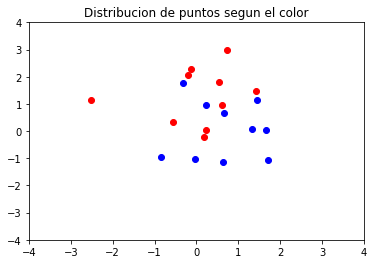

In [72]:
visualize_colors(centros_azul, centros_rojo)

In [8]:
def Simulacion(centros, N):
    
    Ncentros = centros.shape[1]
    
    #Inicializamos la lista de observaciones 
    observations = np.zeros((2,N))
    
    #Definimos un valor global para la covarianza
    covarianza = np.identity(2)/5
       
    #hacemos un loop entre 0 y N para generar todos las observaciones requeridas
    
    for obs in range(0,N):
        #generamos un numero aleatorio entre los números 0 y Ncentros-1 para escoger el centro de nuestra gaussiana bivariada
        indice_del_centro = random.randint(0, Ncentros-1)
        
        xcentro = centros[0,indice_del_centro]
        ycentro = centros[1,indice_del_centro]
        
        mk_centro = np.array([xcentro, ycentro])
        
        centro_aux = np.random.multivariate_normal(mk_centro,covarianza,1).T
    
        observations[0,obs] = centro_aux[0,0]
        observations[1,obs] = centro_aux[1,0]
    
    return observations

In [9]:
ptos_observados_azul_train =  Simulacion(centros_azul, 100)
ptos_observados_rojo_train =  Simulacion(centros_rojo, 100)

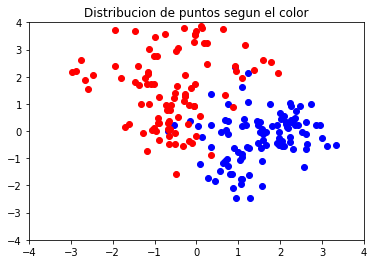

In [10]:
visualize_colors(ptos_observados_azul_train, ptos_observados_rojo_train)

In [11]:
ptos_observados_azul_test =  Simulacion(centros_azul, 5000)
ptos_observados_rojo_test =  Simulacion(centros_rojo, 5000)

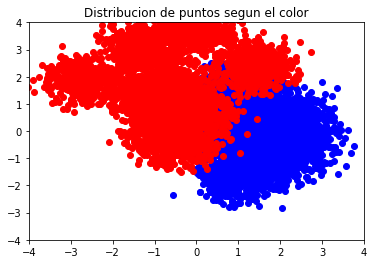

In [12]:
visualize_colors(ptos_observados_azul_test, ptos_observados_rojo_test)

In [13]:
x1azul_train = ptos_observados_azul_train[0,:]
x2azul_train = ptos_observados_azul_train[1,:]

x1rojo_train = ptos_observados_rojo_train[0,:]
x2rojo_train = ptos_observados_rojo_train[1,:]


x1azul_test = ptos_observados_azul_test[0,:]
x2azul_test = ptos_observados_azul_test[1,:]

x1rojo_test = ptos_observados_rojo_test[0,:]
x2rojo_test = ptos_observados_rojo_test[1,:]

Formación de las matrices X, X_test y los vectores de output:

In [14]:
X = []
y = [] 

for i in range(len(x1azul_train)):
    X.append([x1azul_train[i],x2azul_train[i]])
    y.append(0)

for i in range(len(x1rojo_train)):
    X.append([x1rojo_train[i],x2rojo_train[i]])
    y.append(1)

X = np.array(X)
y = np.array(y)

In [15]:
X_test = []
y_test = [] 

for i in range(len(x1azul_test)):
    X_test.append([x1azul_test[i],x2azul_test[i]])
    y_test.append(0)

for i in range(len(x1rojo_test)):
    X_test.append([x1rojo_test[i],x2rojo_test[i]])
    y_test.append(1)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [16]:
X.shape, y.shape, X_test.shape , y_test.shape

((200, 2), (200,), (10000, 2), (10000,))

## Contrucción de Red Neuronal

Añadiremos una capa a la vez, las que seguirán las siguientes características:

- El modelo esperará filas de los datos con 2 variables, por lo que el argumento input_dim=2.
- La primera capa oculta tendrá 2 nodos o neuronas (al parecer el bias no se considera), lo que obtenemos al escribir un 2 en la primera variable de entrada de  Dense y tendrá una función de activación sigmoid, ya que de esta forma lo resolvimos en el resumen.
- La capa de salida tendrá solo una neurona y también usará una función de activación sigmoid.

In [17]:
#Definición del modelo utilizando Keras
model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# Compilación del modelo:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [18]:
# ajustar el modelo al conjunto de datos de entrenamiento (con esto se aprenden los wights)
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
200/200 [==============================] - 1s 3ms/step - loss: 0.7817 - accuracy: 0.5000
Epoch 2/150
200/200 [==============================] - 0s 608us/step - loss: 0.7749 - accuracy: 0.5000
Epoch 3/150
200/200 [==============================] - 0s 550us/step - loss: 0.7682 - accuracy: 0.5000
Epoch 4/150
200/200 [==============================] - 0s 610us/step - loss: 0.7619 - accuracy: 0.5000
Epoch 5/150
200/200 [==============================] - 0s 541us/step - loss: 0.7555 - accuracy: 0.5000
Epoch 6/150
200/200 [==============================] - 0s 509us/step - loss: 0.7497 - accuracy: 0.5000
Epoch 7/150
200/200 [==============================] - 0s 413us/step - loss: 0.7439 - accuracy: 0.5000
Epoch 8/150
200/200 [==============================] - 0s 487us/step - loss: 0.7382 - accuracy: 0.5000
Epoch 9/150
200/200 [==============================] - 0s 497us/step - loss: 0.7327 - accuracy: 0.5000
Epoch 10/150
200/200 [==============================] - 0s 492us/step - los

200/200 [==============================] - 0s 387us/step - loss: 0.4023 - accuracy: 0.9150
Epoch 80/150
200/200 [==============================] - 0s 410us/step - loss: 0.3988 - accuracy: 0.9150
Epoch 81/150
200/200 [==============================] - 0s 491us/step - loss: 0.3953 - accuracy: 0.9150
Epoch 82/150
200/200 [==============================] - 0s 533us/step - loss: 0.3919 - accuracy: 0.9150
Epoch 83/150
200/200 [==============================] - 0s 643us/step - loss: 0.3886 - accuracy: 0.9100
Epoch 84/150
200/200 [==============================] - 0s 779us/step - loss: 0.3853 - accuracy: 0.9150
Epoch 85/150
200/200 [==============================] - 0s 605us/step - loss: 0.3820 - accuracy: 0.9150
Epoch 86/150
200/200 [==============================] - 0s 468us/step - loss: 0.3789 - accuracy: 0.9150
Epoch 87/150
200/200 [==============================] - 0s 379us/step - loss: 0.3758 - accuracy: 0.9150
Epoch 88/150
200/200 [==============================] - 0s 456us/step - loss:

In [19]:
# evaluación del modelo para el conjunto de entrenamiento
J_train, accuracy_train = model.evaluate(X, y)
print('Accuracy train: %.2f' % (accuracy_train*100))

200/200 [==============================] - 0s 251us/step
Accuracy train: 92.50


In [20]:
# evaluación del modelo para el conjunto de testeo
J_test, accuracy_test = model.evaluate(X_test, y_test)
print('Accuracy test: %.2f' % (accuracy_test*100))

10000/10000 [==============================] - 1s 66us/step
Accuracy test: 88.75


Para aumentar la presición se podrían utilizar más neuronas en la capa oculta o agregar más capas ocultas.

## Visualización de Predicciones

In [21]:
prediccion_train = model.predict(X) #sin aproximar
prediccion_final_train = [round(x[0]) for x in prediccion_train] #aproxima a 1 o a 0

prediccion_test = model.predict(X_test) #sin aproximar
prediccion_final_test = [round(x[0]) for x in prediccion_test] #aproxima a 1 o a 0

In [22]:
puntos_azul_train = []
puntos_rojo_train = []

for i in range(len(prediccion_final_train)):
    if prediccion_final_train[i] == 1:
        puntos_rojo_train.append(X[i])
    else:
        puntos_azul_train.append(X[i])
        
puntos_azul_test = []
puntos_rojo_test = []

for i in range(len(prediccion_final_test)):
    if prediccion_final_test[i] == 1:
        puntos_rojo_test.append(X_test[i])
    else:
        puntos_azul_test.append(X_test[i])
        

In [23]:
puntos_azul_train_t = np.array(puntos_azul_train).transpose()
puntos_rojo_train_t = np.array(puntos_rojo_train).transpose()

puntos_azul_test_t = np.array(puntos_azul_test).transpose()
puntos_rojo_test_t = np.array(puntos_rojo_test).transpose()

In [24]:
def visualize_colors(ptos_azul, ptos_rojo):

    x1azul = ptos_azul[0]
    x2azul = ptos_azul[1]
    
    x1rojo = ptos_rojo[0]
    x2rojo = ptos_rojo[1]
    
    plt.plot(x1azul,x2azul,"bo")
    plt.plot(x1rojo,x2rojo,"ro")
    plt.axis([-4,4,-4,4])
    plt.title("Distribucion de puntos segun el color")
    plt.show() 

A continuación se visualizan las predicciones hechas por el modelo

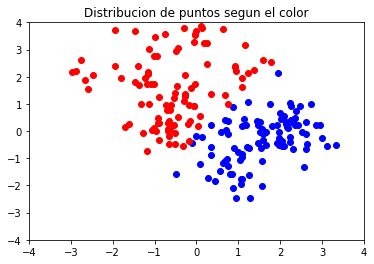

In [25]:
visualize_colors(puntos_azul_train_t, puntos_rojo_train_t)

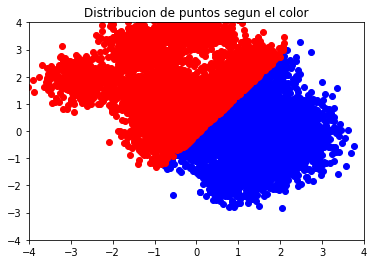

In [26]:
visualize_colors(puntos_azul_test_t, puntos_rojo_test_t)